<a href="https://colab.research.google.com/github/wars2/acoplamento-quartico-anomalo/blob/main/Acoplamento_4Anomalo_NN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
#!python3 -m pip install --user mplhep
!pip install --user mplhep
import mplhep as hep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
PATH = '/content/drive/MyDrive/IC/dados/dados_ic_23-6-2022/'
raiz_s = 13000
plt.style.use([hep.style.ROOT, hep.style.firamath])

# Abrindo eventos de Background + Dados

In [5]:
def open_file_back( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 0

        #corte nos dados
        df_cut = (
                    (df[b'xi1'] > 0.04) & (df[b'xi1'] < 0.111) &
                    (df[b'xi2'] > 0.04) & (df[b'xi2'] < 0.138) &
                    (df[b'muon_pt'] > 53)                      &
                    (df[b'muon_eta'] < 2.4)                    &
                    (df[b'jetAK8_pt'] > 200)                   &
                    (df[b'jet_eta'] < 2.4)                     &
                    (df[b'METPt'] > 40)                        &
                    (df[b'W_pt_lep'] > 200)

                    
                    #(df[b'muon_pt'] > 53)                      &
                    #(df[b'xi1'] > 0.04) & (df[b'xi1'] < 0.111) & 
                    #(df[b'xi2'] > 0.04) & (df[b'xi2'] < 0.138) &
                    #(df[b'muon_eta'] < 2.4)                    &
                    #(df[b'jetAK8_pt'] > 200)                   &
                    #(df[b'jet_eta'] < 2.4)                     &
                    #(df[b'jetAK8_tau21'] < 0.6)                &
                    #(df[b'METPt'] > 40)                        &
                    #(df[b'W_Mass'] > 500)                      &
                    #(df[b'W_pt_lep'] > 200)                    &
                    #(df[b'dphi_jet_MET'] > 2)                  &
                    #(df[b'dphi_jet_lep'] > 2)
                    
                 )
        
        dset = df[df_cut]

        return dset

In [6]:
#cortes passados no grupo do whatsapp em 1/8/2022
'''
df_cut_JoaoSantos = (
                        (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105) &
                        (df[b'xi1'] > 0.04) & (df[b'xi1'] < 0.111) &
                        (df[b'xi2'] > 0.04) & (df[b'xi2'] < 0.138) &
                        (df[b'btag'] ==0) &
                        (df[b'muon_pt'] > 53) &
                        (df[b'muon_eta'] < 2.4) &
                        (df[b'jetAK8_pt'] > 200) &
                        (df[b'jet_eta'] < 2.4) &
                        (df[b'METPt'] > 40) &
                        (df[b'W_pt_lep'] > 200)
                    )

df_cut_MatheusMacedo = (
                            (df[b'xi1'] > 0.04) & (df[b'xi1'] < 0.111) &
                            (df[b'xi2'] > 0.04) & (df[b'xi2'] < 0.138) &
                            (df[b'muon_pt'] > 53)                      &
                            (df[b'muon_eta'] < 2.4)                    &
                            (df[b'jetAK8_pt'] > 200)                   &
                            (df[b'jet_eta'] < 2.4)                     &
                            (df[b'METPt'] > 40)                        &
                            (df[b'W_pt_lep'] > 200)
                       )
'''

"\ndf_cut_JoaoSantos = (\n                        (df[b'jetAK8_prunedMass'] > 65) & (df[b'jetAK8_prunedMass'] < 105) &\n                        (df[b'xi1'] > 0.04) & (df[b'xi1'] < 0.111) &\n                        (df[b'xi2'] > 0.04) & (df[b'xi2'] < 0.138) &\n                        (df[b'btag'] ==0) &\n                        (df[b'muon_pt'] > 53) &\n                        (df[b'muon_eta'] < 2.4) &\n                        (df[b'jetAK8_pt'] > 200) &\n                        (df[b'jet_eta'] < 2.4) &\n                        (df[b'METPt'] > 40) &\n                        (df[b'W_pt_lep'] > 200)\n                    )\n\ndf_cut_MatheusMacedo = (\n                            (df[b'xi1'] > 0.04) & (df[b'xi1'] < 0.111) &\n                            (df[b'xi2'] > 0.04) & (df[b'xi2'] < 0.138) &\n                            (df[b'muon_pt'] > 53)                      &\n                            (df[b'muon_eta'] < 2.4)                    &\n                            (df[b'jetAK8_pt'] > 20

In [7]:
Drell_Yan = open_file_back(PATH + 'DataSet_multiRP_DrellYan.h5')
QCD = open_file_back(PATH + 'DataSet_multiRP_QCD.h5')
Single_top = open_file_back(PATH + 'DataSet_multiRP_single_top.h5')
VV_Inclusivo = open_file_back(PATH + 'DataSet_multiRP_VV_inclusivo.h5')
W_Jets = open_file_back(PATH + 'DataSet_multiRP_WJets.h5')
TT_bar = open_file_back(PATH + 'DataSet_TTbar.h5')

data = open_file_back(PATH + 'DataSet_dados_multiRP.h5')

concat = pd.concat([Drell_Yan, QCD, Single_top, VV_Inclusivo, W_Jets, TT_bar])

# Corrigindo as colunas do Background
Deixando os nomes das variáveis iguais

In [10]:
columns_ =  [ 
                b'W_Mass',
                b'W_pt_lep',
                b'dPhi_Whad_Wlep',
                b'dPhi_jatos_MET',
                b'jetAK8_pt',
                b'jetAK8_eta',
                b'jetAK8_prunedMass',
                b'jetAK8_tau21',
                b'METPt',
                b'muon_pt',
                b'muon_eta',
                b'ExtraTracks',
                b'PUWeight',
                b'W_rapidity',
                b'btag',
                b'xi1',
                b'xi2',
                b'ismultirp1',
                b'ismultirp2',
                b'Norm',
                b'weight',
                b'Mpps',
                b'Ypps',
                b'Mww/Mpps',
                b'Ypps-Yww',
                b'label'
            ]

In [11]:
DrellYan = pd.DataFrame( np.array(Drell_Yan),columns=columns_ )
QCD_ = pd.DataFrame( np.array(QCD),columns=columns_ )
SingleTop = pd.DataFrame( np.array(Single_top),columns=columns_ )
VVInclusivo = pd.DataFrame( np.array(VV_Inclusivo),columns=columns_ )
Wjets = pd.DataFrame( np.array(W_Jets),columns=columns_ )
TTbar = pd.DataFrame( np.array(TT_bar),columns=columns_ )

concat_back = pd.concat([DrellYan, QCD_, SingleTop, VVInclusivo, Wjets, TTbar])

concat_back[b'label'] = 0

# Abrindo eventos de Sinal + Modelo Padrão

In [12]:
def open_file_signal( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 1

        df_cut = (
                    (df[b'xi1'] > 0.04) & (df[b'xi1'] < 0.111) &
                    (df[b'xi2'] > 0.04) & (df[b'xi2'] < 0.138) & 
                    (df[b'muon_pt'] > 53)                      &
                    (df[b'muon_eta'] < 2.4)                    & 
                    (df[b'jetAK8_pt'] > 200)                   &
                    (df[b'jetAK8_eta'] < 2.4)                  &
                    (df[b'jetAK8_tau21'] < 0.6)                &
                    (df[b'W_Mass'] > 500)                      &
                    (df[b'W_pt_lep'] > 200)                    &
                    (df[b'METPt'] > 40)                        &
                    (df[b'METPt'] > 2)                         &
                    (df[b'dPhi_Whad_Wlep'] > 2)
                )

        dset = df[df_cut]
        
        return dset



def open_file_SM( file ):
    df = None
    with h5py.File( file , 'r' ) as f:
        dset_columns = f['columns']
        dset_dados = f['dados']
        #print( '\n colunas --> ', np.array( dset_columns ),'\n' )
        df = pd.DataFrame( np.array(dset_dados), columns = np.array( dset_columns))
        df[b'Mpps'] = raiz_s * ( np.sqrt( df[b'xi1'] * df[b'xi2'] ) )
        df[b'Ypps'] = 1/2 * np.log( df[b'xi1'] / df[b'xi2'] )
        df[b'Mww/Mpps'] = df[b'W_Mass'] / df[b'Mpps']
        df[b'Ypps-Yww'] = df[b'Ypps'] - df[b'W_rapidity']
        df[b'label'] = 1

        df_cut = (
                    (df[b'xi1'] > 0.04) & (df[b'xi1'] < 0.111) &
                    (df[b'xi2'] > 0.04) & (df[b'xi2'] < 0.138) &
                    (df[b'muon_pt'] > 53)                      &
                    (df[b'muon_eta'] < 2.4)                    &
                    (df[b'jetAK8_pt'] > 200)                   &
                    (df[b'jetAK8_eta'] < 2.4)                  &
                    (df[b'jetAK8_tau21'] < 0.6)                &
                    (df[b'W_Mass'] > 500)                      &
                    (df[b'W_pt_lep'] > 200)                    &
                    (df[b'METPt'] > 40)                        &
                    (df[b'METPt'] > 2)                         &
                    (df[b'dPhi_Whad_Wlep'] > 2)
                 )
        dset = df[df_cut]
        return dset


In [13]:
A01 = open_file_signal( PATH + 'output-DataSet_ANOMALO1_multiRP.h5' )
A02 = open_file_signal( PATH + 'output-DataSet_ANOMALO2_multiRP.h5' )
A03 = open_file_signal( PATH + 'output-DataSet_ANOMALO3_multiRP.h5' )
A04 = open_file_signal( PATH + 'output-DataSet_ANOMALO4_multiRP.h5' )
A05 = open_file_signal( PATH + 'output-DataSet_ANOMALO5_multiRP.h5' )
A06 = open_file_signal( PATH + 'output-DataSet_ANOMALO6_multiRP.h5' )
A07 = open_file_signal( PATH + 'output-DataSet_ANOMALO7_multiRP.h5' )
A08 = open_file_signal( PATH + 'output-DataSet_ANOMALO8_multiRP.h5' )

SM = open_file_SM( PATH + 'output-SM_multiRP.h5' )

# Montando os Plots

Text(0.5, 1.0, 'Signal')

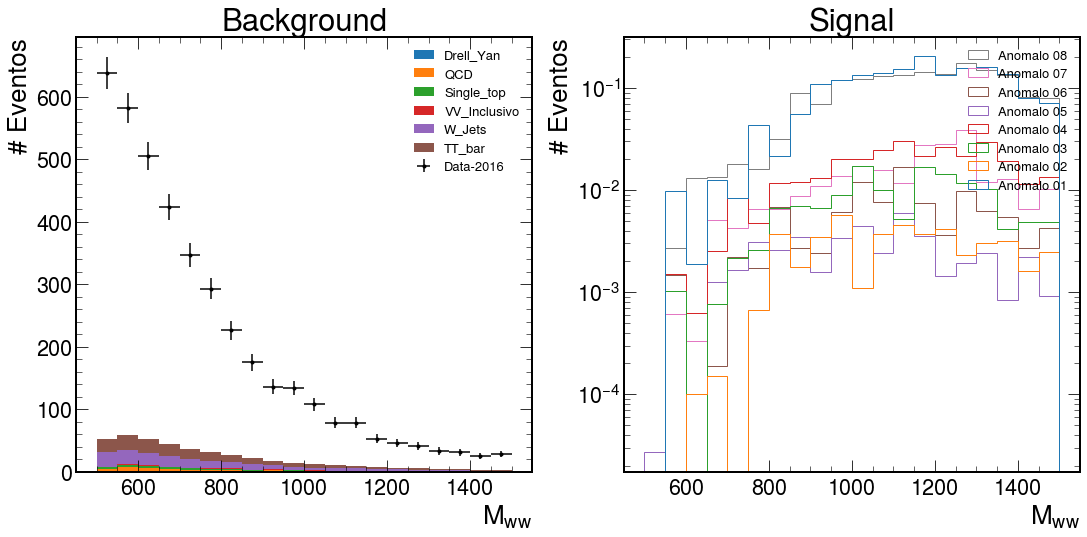

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'W_Mass' 
range_ = (500, 1500)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados no Background
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$M_{ww}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$M_{ww}$')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

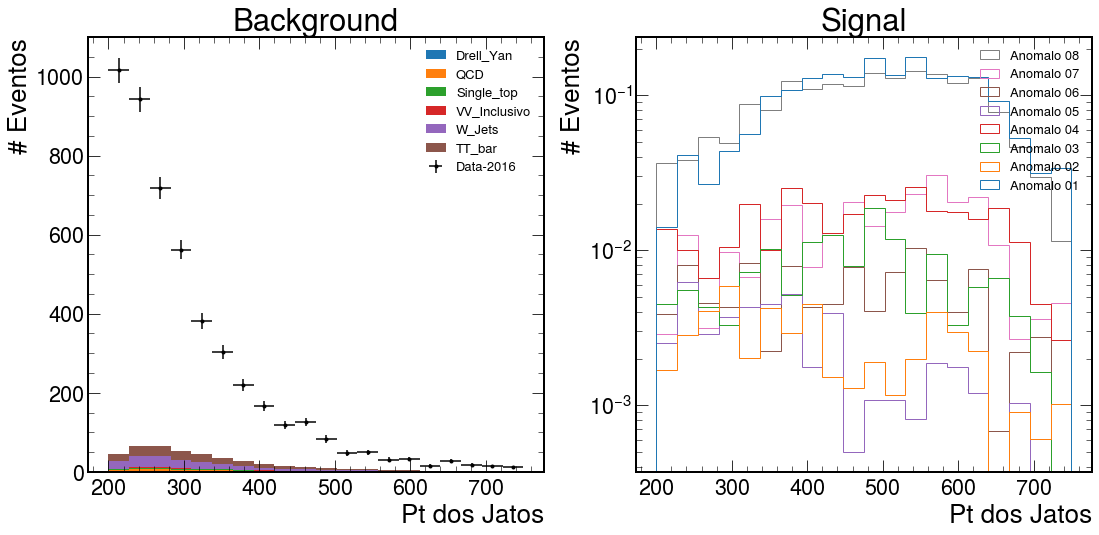

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'jetAK8_pt' 
range_ = (200, 750)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Pt dos Jatos')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Pt dos Jatos')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

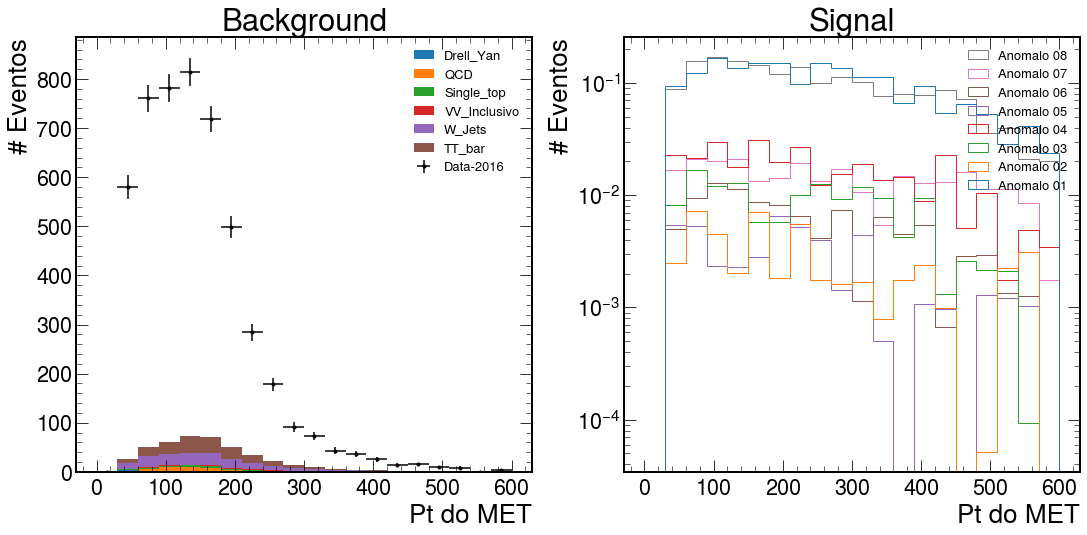

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'METPt' 
range_ = (0, 600)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Pt do MET')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Pt do MET')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

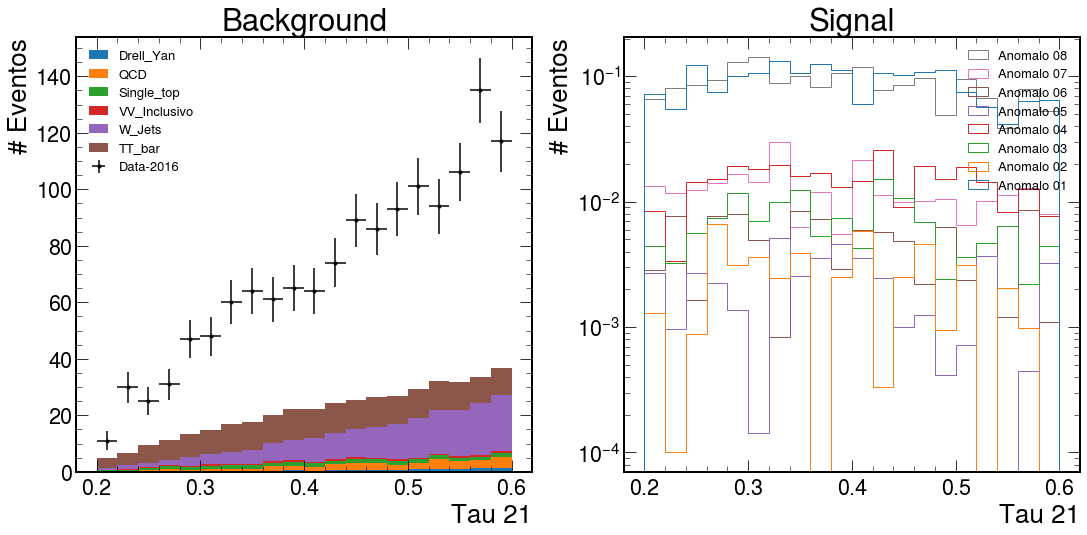

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'jetAK8_tau21' 
range_ = (0.2, 0.6)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Tau 21')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Tau 21')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

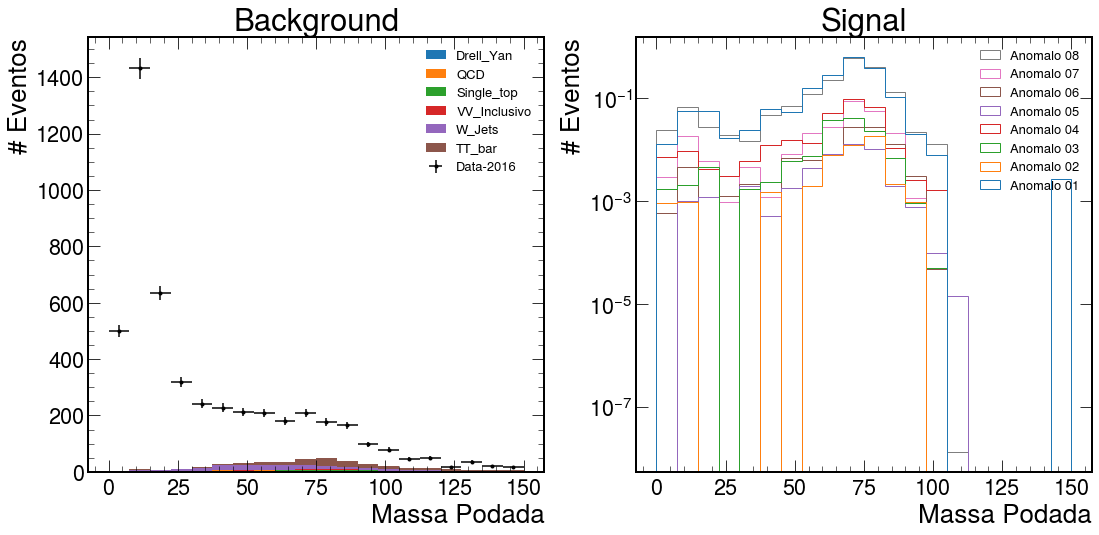

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'jetAK8_prunedMass' 
range_ = (0, 150)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Massa Podada')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Massa Podada')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

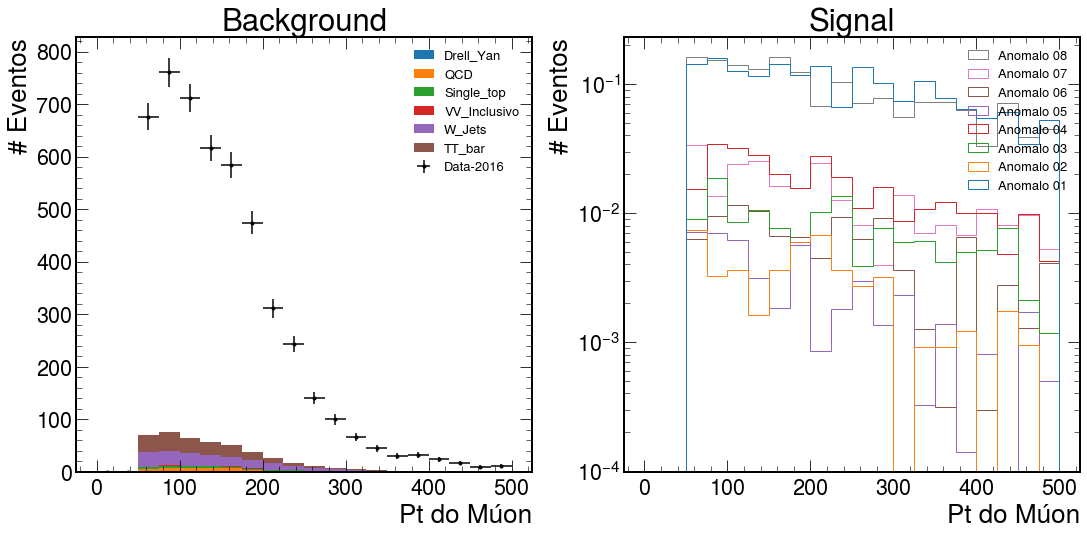

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'muon_pt' 
range_ = (0, 500)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Pt do Múon')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Pt do Múon')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

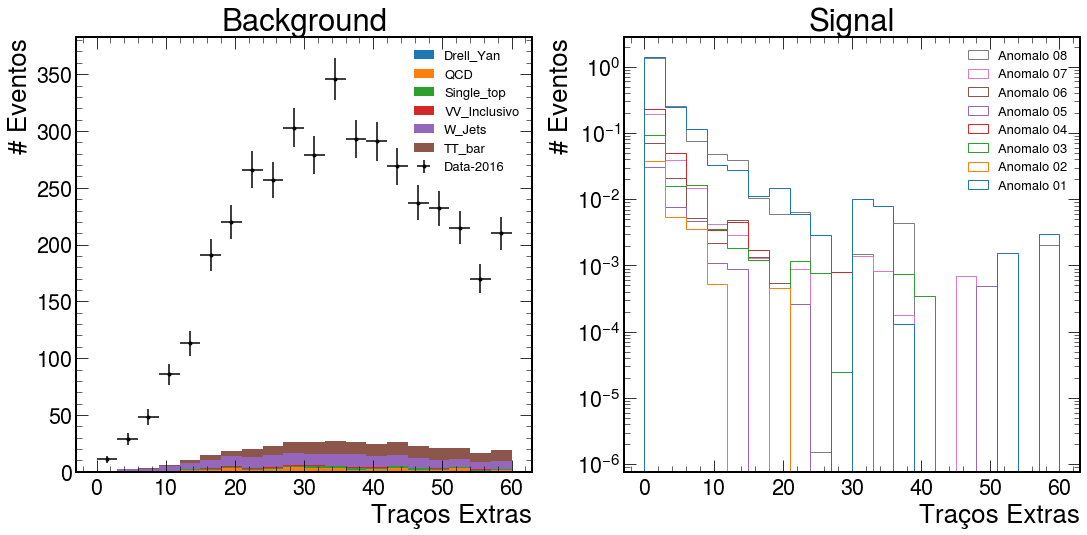

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'ExtraTracks' 
range_ = (0, 60)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Traços Extras')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Traços Extras')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

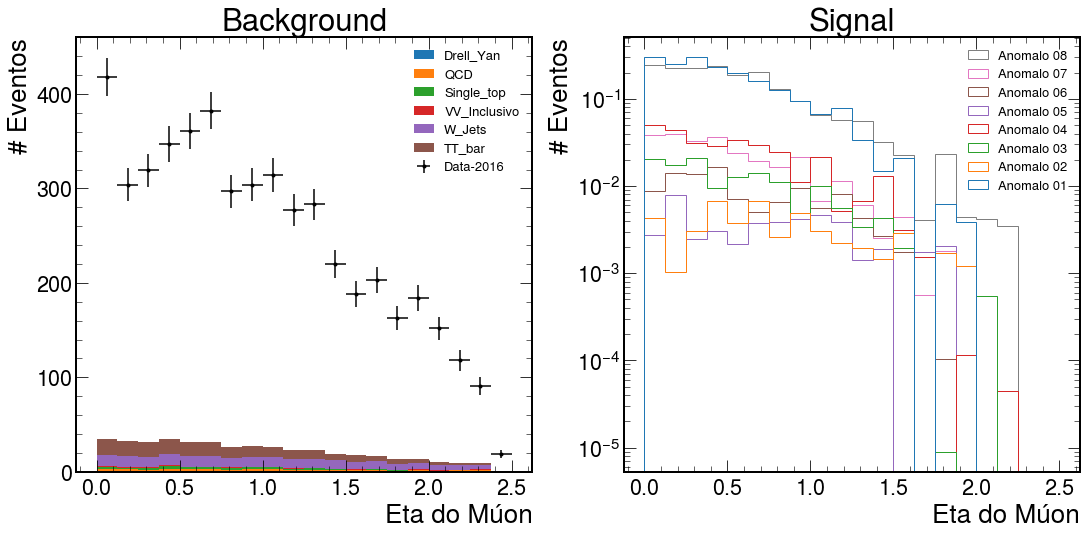

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'muon_eta' 
range_ = (0, 2.5)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Eta do Múon')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Eta do Múon')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

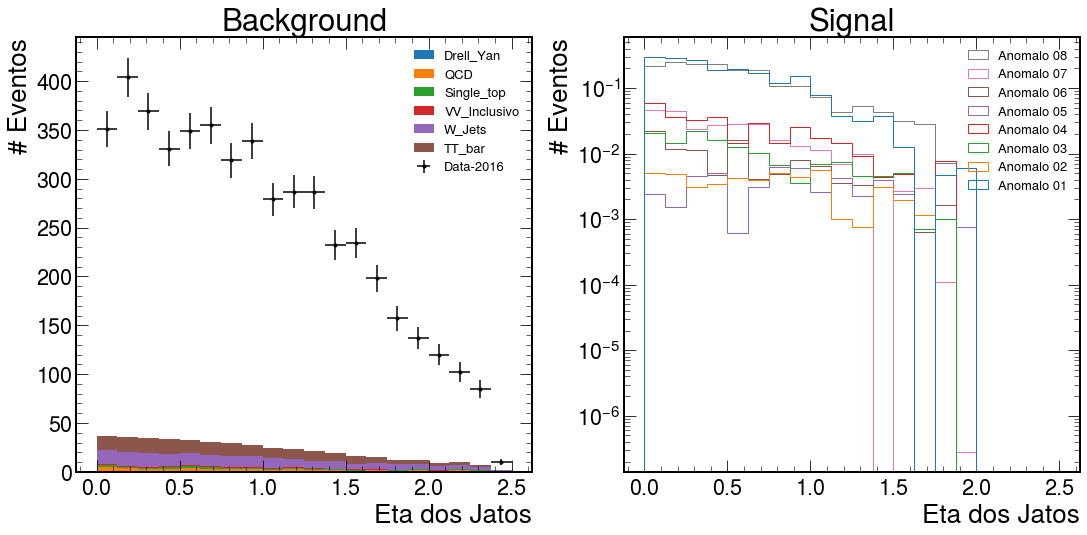

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'jetAK8_eta'
var1 = b'jet_eta'
range_ = (0, 2.5)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var1] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Eta dos Jatos')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Eta dos Jatos')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

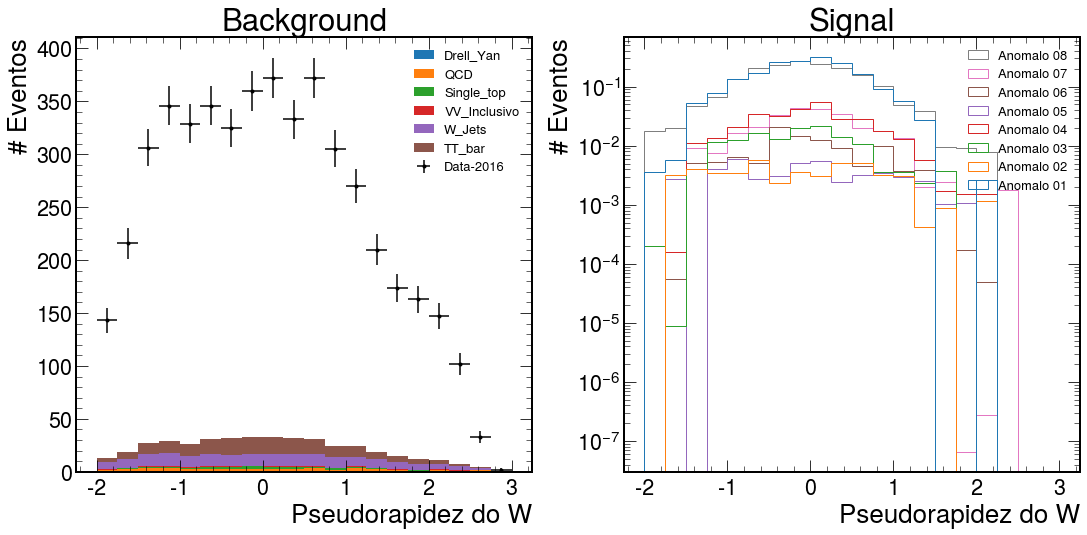

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'W_rapidity'
range_ = (-2, 3)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('Pseudorapidez do W')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('Pseudorapidez do W')
plt.ylabel('# Eventos')
plt.title('Signal')



In [ ]:
data.columns

Index([           b'W_Mass',          b'W_pt_lep',      b'dphi_jet_lep',
            b'dphi_jet_MET',         b'jetAK8_pt',           b'jet_eta',
       b'jetAK8_prunedMass',      b'jetAK8_tau21',             b'METPt',
                 b'muon_pt',          b'muon_eta',       b'ExtraTracks',
                b'PUWeight',        b'W_rapidity',              b'btag',
                     b'xi1',               b'xi2',        b'ismultirp1',
              b'ismultirp2',              b'Mpps',              b'Ypps',
                b'Mww/Mpps',          b'Ypps-Yww',             b'label'],
      dtype='object')

Text(0.5, 1.0, 'Signal')

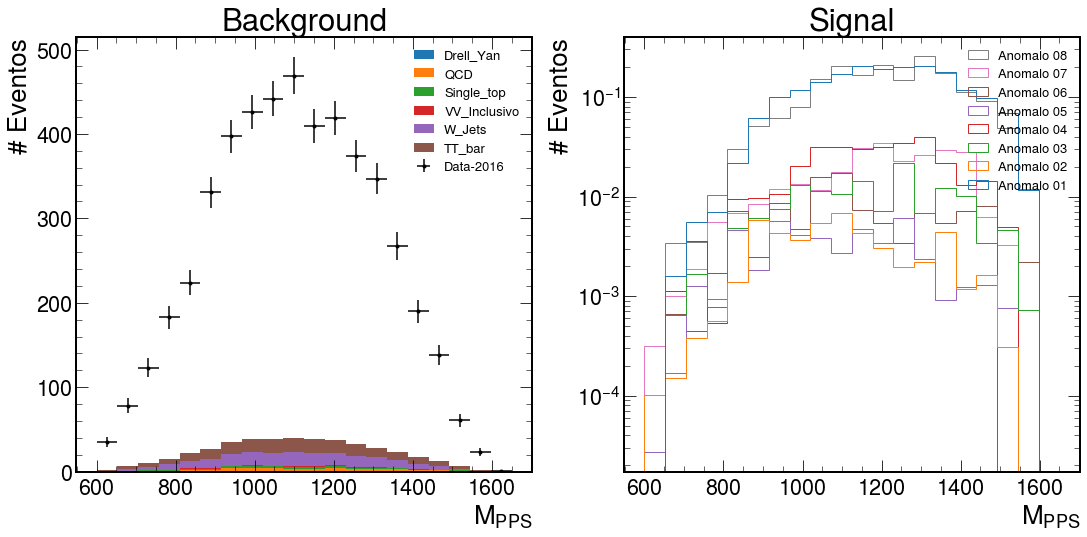

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'Mpps'
range_ = (600, 1650)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$M_{PPS}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$M_{PPS}$')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

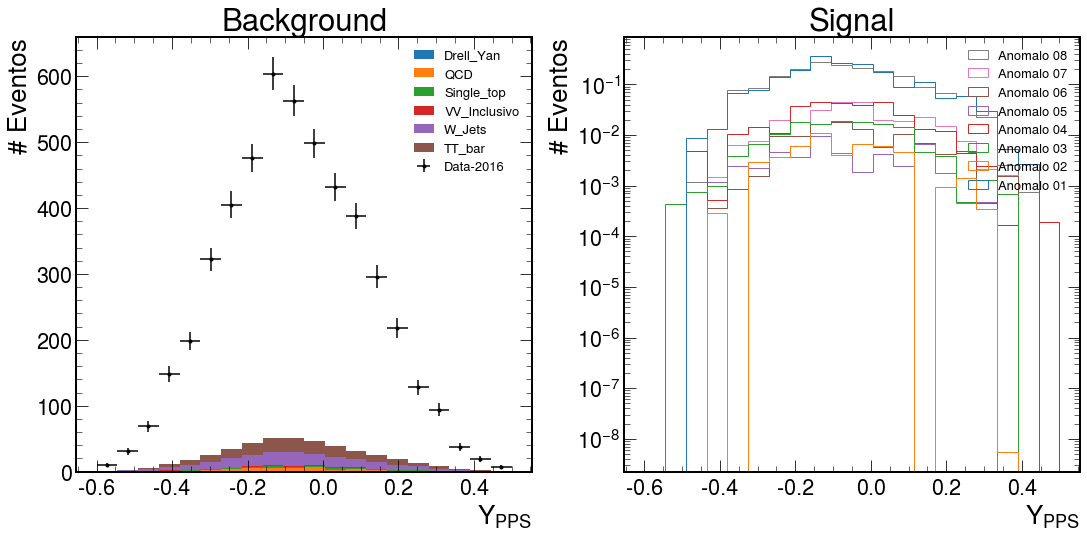

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'Ypps'
range_ = (-0.6, 0.5)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$Y_{PPS}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$Y_{PPS}$')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

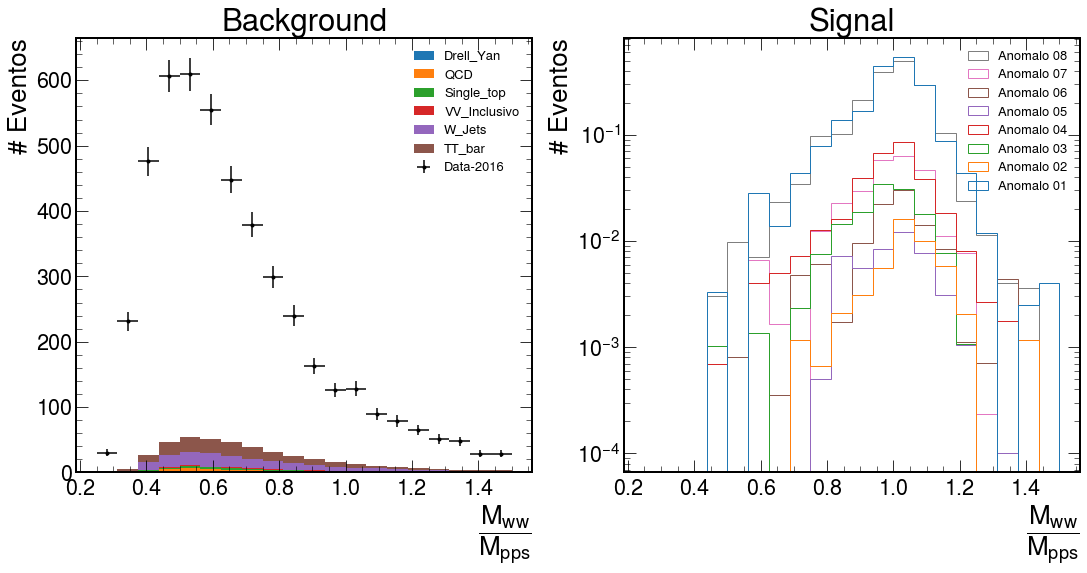

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'Mww/Mpps'
range_ = (0.25, 1.5)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$\dfrac{\mathcal{M}_{ww}}{\mathcal{M}_{pps}}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$\dfrac{\mathcal{M}_{ww}}{\mathcal{M}_{pps}}$')
plt.ylabel('# Eventos')
plt.title('Signal')



Text(0.5, 1.0, 'Signal')

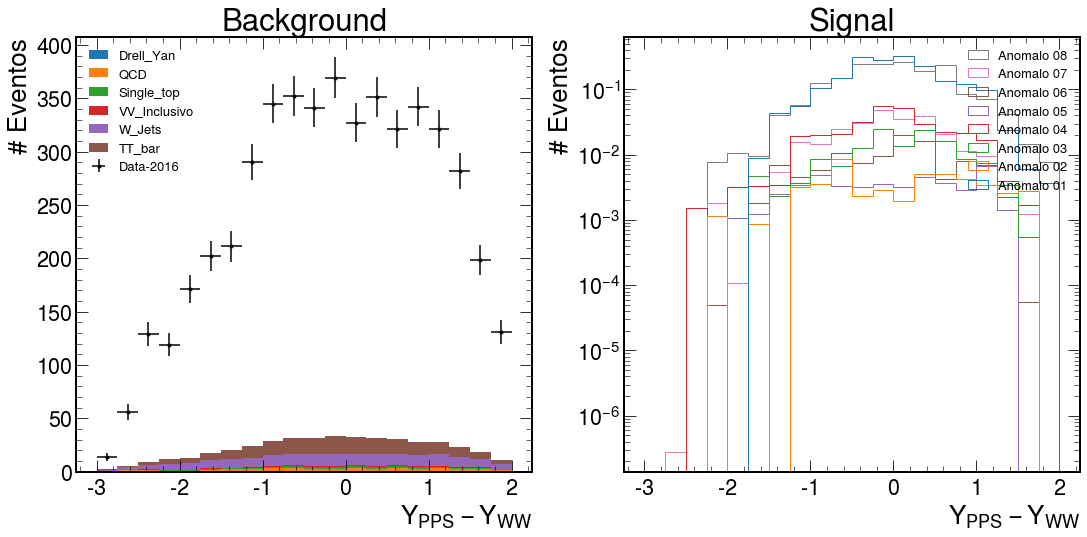

In [ ]:
plt.figure(figsize = (18, 8))
bin = 20
var = b'Ypps-Yww'
range_ = (-3, 2)

# Background
plt.subplot(121)
Mww_back = [ DrellYan[var], QCD_[var], SingleTop[var], VVInclusivo[var], Wjets[var], TTbar[var] ]
label_back = [ 'Drell_Yan', 'QCD', 'Single_top', 'VV_Inclusivo', 'W_Jets', 'TT_bar' ]
weights_back = [ Drell_Yan[b'weight'], QCD[b'weight'], Single_top[b'weight'], VV_Inclusivo[b'weight'], W_Jets[b'weight'], TT_bar[b'weight'] ]

# Dados
counts_1, bin_edges_1 = np.histogram( data[var] , bins = bin, range = range_ )
errors_1 = np.sqrt( counts_1 )
bin_centres_1 = ( bin_edges_1[:-1] + bin_edges_1[1:] ) / 2.
plt.errorbar( bin_centres_1, counts_1, yerr=errors_1, xerr=abs(bin_centres_1[0] - bin_centres_1[1])/2, fmt='.', label = 'Data-2016', color = 'black' )

plt.hist(Mww_back, label = label_back, bins = bin, weights = weights_back, range = range_, stacked = True, histtype = 'bar', linestyle = '-')
plt.legend(loc = 'best', fontsize = 13)
#plt.yscale('log')
plt.xlabel('$Y_{PPS}-Y_{WW}$')
plt.ylabel('# Eventos')
plt.title('Background')


# Signal
plt.subplot(122)
Mww_signal = [ A01[var], A02[var], A03[var], A04[var], A05[var], A06[var], A07[var], A08[var] ]
label_signal = [ 'Anomalo 01', 'Anomalo 02', 'Anomalo 03', 'Anomalo 04', 'Anomalo 05', 'Anomalo 06', 'Anomalo 07', 'Anomalo 08',  ]
weights_signal = [ A01[b'weight'], A02[b'weight'], A03[b'weight'], A04[b'weight'], A05[b'weight'], A06[b'weight'], A07[b'weight'], A08[b'weight'] ]


plt.hist(Mww_signal, label = label_signal, bins = bin, weights = weights_signal, range = range_, histtype = 'step', linestyle = '-')
plt.yscale('log')
plt.legend(loc = 'best', fontsize = 13)
plt.xlabel('$Y_{PPS}-Y_{WW}$')
plt.ylabel('# Eventos')
plt.title('Signal')



# Rede Neural

## preparando o dataset para inserção na rede neural

In [14]:
comum = list(set(concat_back.columns).intersection(A01.columns))
print(comum)
print(len(comum))

[b'dPhi_jatos_MET', b'ismultirp2', b'jetAK8_prunedMass', b'W_pt_lep', b'Ypps-Yww', b'jetAK8_pt', b'label', b'btag', b'Norm', b'W_rapidity', b'Mpps', b'xi1', b'xi2', b'ismultirp1', b'weight', b'muon_pt', b'ExtraTracks', b'jetAK8_eta', b'Mww/Mpps', b'W_Mass', b'PUWeight', b'dPhi_Whad_Wlep', b'Ypps', b'jetAK8_tau21', b'METPt', b'muon_eta']
26


In [15]:
A01_filtrado=A01.filter(comum, axis=1)
copia=concat_back.copy()
back_A01=pd.concat([concat_back, A01_filtrado], ignore_index=True) #sera que não ordenar o indice interfere no treinamento?
back_A01.describe()

,b'W_Mass',b'W_pt_lep',b'dPhi_Whad_Wlep',b'dPhi_jatos_MET',b'jetAK8_pt',b'jetAK8_eta',b'jetAK8_prunedMass',b'jetAK8_tau21',b'METPt',b'muon_pt',...,b'xi2',b'ismultirp1',b'ismultirp2',b'Norm',b'weight',b'Mpps',b'Ypps',b'Mww/Mpps',b'Ypps-Yww',b'label'
count,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000,...,185957.000000,185957.0,185957.0,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000,185957.000000
mean,1027.814638,411.850052,2.916612,2.819449,436.381556,0.847918,85.304498,0.457541,222.731948,197.717450,...,0.093227,1.0,1.0,0.037139,0.002338,1099.650588,-0.074075,0.969833,-0.101289,0.003286
std,517.823387,334.698982,0.202330,0.317463,219.194209,0.594175,50.577583,0.104177,159.211492,307.617850,...,0.025420,0.0,0.0,0.084747,0.006901,203.740010,0.188348,0.535670,1.129193,0.057227
min,500.000193,200.003064,2.000154,-3.141445,200.003209,0.000033,-0.000008,0.050611,40.001749,53.000263,...,0.040020,1.0,1.0,0.000346,0.000000,530.815854,-0.609921,0.320085,-3.271489,0.000000
25%,666.419481,276.565283,2.828659,2.689144,282.968055,0.354201,53.343960,0.385883,114.518282,97.033066,...,0.072399,1.0,1.0,0.004321,0.000191,950.718043,-0.204159,0.608763,-0.926464,0.000000
50%,858.934590,340.881422,2.976777,2.891683,362.410274,0.746372,77.101059,0.477021,181.952225,154.469833,...,0.094152,1.0,1.0,0.019611,0.001015,1097.679927,-0.080892,0.811296,-0.072522,0.000000
75%,1247.162234,478.889838,3.065894,3.023880,524.460913,1.248670,104.302696,0.545417,275.473514,238.877777,...,0.114552,1.0,1.0,0.019611,0.002120,1250.558377,0.052528,1.169013,0.775451,0.000000
max,10963.352341,93356.685472,3.141593,3.141592,2999.215527,2.399983,674.223755,0.599997,2709.360923,93108.765625,...,0.138000,1.0,1.0,3.054518,0.647122,1606.774135,0.499257,13.041782,2.738091,1.000000


## Implementação da rede neural

### implementação via tutorial da internet (fraco)

In [ ]:
#ref: https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Binary Classification with Sonar Dataset: Baseline
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold


KeyboardInterrupt



In [ ]:
# load dataset
dataframe = back_A01.copy()
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:25].astype(float)
Y = dataset[:,25]

In [ ]:
#data normalization
scaler = MinMaxScaler()
scaler.fit(dataframe)
scaled = scaler.fit_transform(dataframe)
scaled_df = pd.DataFrame(scaled, columns=dataframe.columns)

X_normalized = scaled[:,0:25].astype(float)

In [ ]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(25, input_shape=(25,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# evaluate model with standardized dataset
modelo=create_baseline()
estimator = KerasClassifier(model=modelo, epochs=20, batch_size=20, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_normalized, encoded_Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
# serialize model to JSON
model_json = modelo.to_json()
with open("Background+Anomalo01-normalizado.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo.save_weights("Background+Anomalo01-normalizado.h5")
print("Saved model to disk")

### implementação via ml4jets do macedo

#### ml4jets_util.py

In [16]:
#ml4jets_util.py
import pandas as pd
import numpy as  np

import keras.backend as K
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve,precision_recall_curve

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0.0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def do_scaler(X,Y, scaler_X, scaler_Y):
    if scaler_X == None:
        X_scaled = X
    else:
        X_scaled = scaler_X.fit_transform(X)
    if scaler_Y == None:
        Y_scaled = Y
    else:
        Y_scaled = scaler_Y.fit_transform(Y)
    return X_scaled, Y_scaled, scaler_X, scaler_Y

def test_model(X,Y, model, scaler_X = None, verbose = 1):
    if scaler_X is not None:
        X_scaled = scaler_X.transform(X)
    else:
        X_scaled = X
    y_probs = model.predict_proba(X_scaled)  # calculate the probability
    preds = model.predict(X_scaled)
    prec, rec, thresh = precision_recall_curve(Y, y_probs[:,1])
    bidx = np.argmax(prec * rec)
    best_cut = thresh[bidx]
    print(best_cut)

    preds = y_probs[:,1] >= best_cut

    if verbose == 1:

        fpr, tpr, thresholds = metrics.roc_curve(Y, y_probs[:,1], drop_intermediate=False)
        print(f'AUC = {metrics.auc(fpr, tpr)}')
        print("Purity in test sample     : {:2.2f}%".format(100 * precision_score(Y, preds)))
        print("Efficiency in test sample : {:2.2f}%".format(100 * recall_score(Y, preds)))
        print("Accuracy in test sample   : {:2.2f}%".format(100 * accuracy_score(Y, preds)))


#### ml4jets_models.py

In [17]:
#ml4jets_models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.optimizers import SGD
#from ml4jets_util import f1_score


# Funcao para criar um modelo conforme requerido pelo KerasClassifier
def baseline_mlp(number_of_features=13, neurons=1,optimizer='adam',activation='relu'):
    # create model
    # #
    #
    model = Sequential()
    model.add(Dense(neurons, input_dim=number_of_features, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',f1_score])
    return model

def baseline_sgd(number_of_features=13, neurons = 1, learn_rate=0.01, momentum=0, activation = 'relu'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=number_of_features, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy',f1_score])
    return model

def baseline_deep(number_of_features=13, neurons1 = 1,neurons2 = 1,neurons3 = 1, optimizer='adam', activation = 'relu'):
    # create model
    # #
    #
    model = Sequential()
    model.add(Dense(neurons1, input_dim=number_of_features, kernel_initializer='normal', activation = activation))
    model.add(Dense(neurons2, kernel_initializer='normal', activation=activation))
    model.add(Dense(neurons3, kernel_initializer='normal', activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', metrics=['accuracy',f1_score], optimizer=optimizer)
    return model

def baseline_dropout(number_of_features=13, neurons1 = 1,neurons2 = 1,neurons3 = 1, dropout_rate=0.0):
    # create model
    # #
    #
    model = Sequential()
    model.add(Dense(neurons1, input_dim=number_of_features, kernel_initializer='normal', activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons3, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', metrics=['accuracy',f1_score], optimizer= 'adam')
    return model

def baseline_dropout_input(number_of_features=13,neurons1 = 1,neurons2 = 1,neurons3 = 1, dropout_rate=0.0):
    # create model
    # #
    #
    model = Sequential()
    model.add(Dropout(dropout_rate, input_shape=(number_of_features,)))
    model.add(Dense(neurons1, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons2, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons3, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', metrics=['accuracy',f1_score], optimizer= 'adam')
    return model

#### ml4jets_grid_mlp.py

In [ ]:
#ml4jets_grid_mlp.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from pandas import set_option
#from ml4jets_models import  baseline_mlp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.preprocessing import StandardScaler
#from ml4jets_util import do_scaler
#from ml4jets_models import baseline_mlp, baseline_sgd, baseline_deep, baseline_dropout, baseline_dropout_input

# ml4jets_random_mlp: Use GridSearchCV to find the best parameters for the mlp models
# after you locate the best parameter region with the randomized search, you can perform a local search
# ver 0.1 : Jorge Amaral
program_name = "ml4jets_grid_mlp.py"
# load example dataset
# dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# X_train = dataset[:,0:8]
# Y_train = dataset[:,8]
# number_of_features = [X_train.shape[1]]

#load jets dataset
train_csv = "train_export_jets.csv"
#data_train = pd.read_csv(train_csv,encoding='utf-8', sep=',')
data_train = back_A01.copy()
ncols = data_train.shape[1] #get the number of columns
array = data_train.values

# starts at 1: Unnamed:0
X_train = array[:,:ncols-1]
Y_train = array[:,ncols-1]

number_of_features = [ncols-1]

#Use a scaler in the data

scaler = StandardScaler()
scaler_prediction = None

# scaler only on the input
X_train_norm, Y_train_norm, scaler, scaler_prediction = do_scaler(X_train, Y_train, scaler, scaler_prediction)


# epochs = [200, 500, 1000, 2000]
# neurons = [10,50,100, 200]
# neurons1 = [10,50,100, 200] # Only for deep
# neurons2 = [10,50,100, 200]# Only for deep
# neurons3 = [10,50,100, 200] # Only for deep
# batch_size = [64, 128, 256, 512,1024]
# optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# activation = [ 'relu', 'tanh', 'sigmoid', 'linear']
#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3] # Only for SGD
#momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9] # Only for SGD
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
epochs = [500, 1000]
neurons = [10, 20, 50, 100]
batch_size = [64, 128]
optimizer = ['Adam']
activation = [ 'relu']

epochs = [100,200, 500]
#epochs = [10]
neurons = [10,50,100] # MLP
neurons1 = [10,50,100, 200] # Only for deep
neurons2 = [10,50,100, 200]# Only for deep
neurons3 = [10,50,100, 200] # Only for deep
#neurons1 = [300] # Only for deep
#neurons2 = [200]# Only for deep
#neurons3 = [100] # Only for deep
batch_size = [64, 128]
optimizer = ['Adam']
activation = ['relu']
learn_rate = [0.001] # Only for SGD
momentum = [0.8, 0.9] # Only for SGD
dropout_rate = [0.0, 0.1, 0.2]

#  define model: choose the model number
#  you can also put the parameters values in the if for each model

model_number = 4
# Create Model
if model_number == 1:
    model_name = "mlp"
    build_fn = baseline_mlp
    param_search = dict(number_of_features=number_of_features, neurons=neurons, epochs=epochs, batch_size=batch_size, optimizer=optimizer, activation=activation)
elif model_number == 2:
    model_name = "sgd"
    build_fn = baseline_sgd
    param_search = dict(number_of_features=number_of_features, neurons=neurons, learn_rate=learn_rate, momentum=momentum, epochs=epochs, batch_size=batch_size)
elif model_number == 3:
    model_name = "deep"
    build_fn = baseline_deep
    param_search = dict(number_of_features=number_of_features,neurons1=neurons1, neurons2=neurons2, neurons3=neurons3, epochs=epochs, batch_size=batch_size)
elif model_number == 4:
    model_name = "dropout"
    build_fn = baseline_dropout
    param_search = dict(number_of_features=number_of_features,neurons1=neurons1, neurons2=neurons2, neurons3=neurons3, epochs=epochs, batch_size=batch_size, dropout_rate=dropout_rate)
elif model_number ==5:
    model_name = "dropout_input"
    build_fn = baseline_dropout_input
    param_search = dict(number_of_features=number_of_features, neurons1=neurons1, neurons2=neurons2, neurons3=neurons3, epochs=epochs, batch_size=batch_size, dropout_rate=dropout_rate)
else:
    model_name = "sgd"
    build_fn = baseline_sgd(neurons=neurons, learn_rate=learn_rate, momentum=momentum, activation='relu')
    param_search = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, epochs=epochs, batch_size=batch_size)


# define n_iter ( number of models) and cv (number of crossvalidation) and scoring

n_iter = 10
cv = 3
#scoring = make_scorer(fbeta_score, beta=0.5)
#scoring = 'f1'
scoring = None
#scoring = 'accuracy'

#nmodel
model = KerasClassifier(build_fn = build_fn, verbose=2)

#search object

search = GridSearchCV(estimator=model, param_grid=param_search, scoring = scoring ,cv=cv, verbose=4)

start_time = time.time()

search_result = search.fit(X_train_norm, Y_train_norm, verbose=1)
print("--- %s seconds ---" % (time.time() - start_time))

# Results
print("Model: %s Best: %f using %s" % (model_name, search_result.best_score_, search_result.best_params_))
means = search_result.cv_results_['mean_test_score']
stds = search_result.cv_results_['std_test_score']
params = search_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#salvar modelo
model_json = build_fn.to_json()
with open("Background+Anomalo01-normalizado-DL.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
build_fn.save_weights("Background+Anomalo01-normalizado-DL.h5")
print("Saved model to disk")

print("End of %s" %(program_name))

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:133: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


1938/1938 [==============================] - 3s 1ms/step - loss: 0.0399 - accuracy: 0.9947 - f1_score: nan
Epoch 2/100
1938/1938 [==============================] - 2s 1ms/step - loss: 0.0050 - accuracy: 0.9981 - f1_score: nan
Epoch 3/100
1938/1938 [==============================] - 2s 1ms/step - loss: 0.0025 - accuracy: 0.9992 - f1_score: nan
Epoch 4/100
1938/1938 [==============================] - 2s 1ms/step - loss: 0.0020 - accuracy: 0.9994 - f1_score: nan
Epoch 5/100
1938/1938 [==============================] - 2s 1ms/step - loss: 0.0017 - accuracy: 0.9995 - f1_score: nan
Epoch 6/100
1938/1938 [==============================] - 2s 1ms/step - loss: 0.0015 - accuracy: 0.9995 - f1_score: nan
Epoch 7/100
1938/1938 [==============================] - 2s 1ms/step - loss: 0.0014 - accuracy: 0.9996 - f1_score: nan
Epoch 8/100
1938/1938 [==============================] - 2s 1ms/step - loss: 0.0012 - accuracy: 0.9996 - f1_score: nan
Epoch 9/100
1938/1938 [==============================] - 2s 